In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="25"

Data load

In [4]:
#data=pd.read_table('datos/datos.txt')

In [5]:
data=pd.read_csv("datos/datos3.csv")
data=data.rename(columns={'Unnamed: 0':'No'})
data=data.drop('No',axis=1)

In [6]:
data

,X,Y,RV,I
0,144.83,19.6,-248.768878,73.97
1,143.49,19.6,-249.728170,94.17
2,142.15,19.6,-252.788768,101.40
3,140.81,19.6,-260.371743,118.20
4,139.46,19.6,-270.284427,180.00
...,...,...,...,...
595,71.07,0.0,-223.644563,471.50
596,69.73,0.0,-223.827285,631.80
597,68.39,0.0,-223.827285,729.80
598,67.05,0.0,-224.740897,339.00


Bidimensional Data Display

(61.75399999999999, 148.786, -0.9800000000000001, 20.580000000000002)

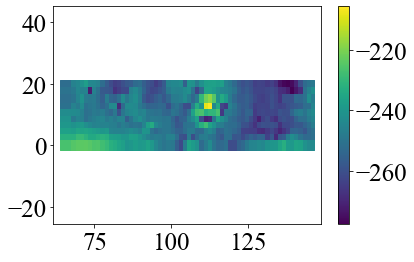

In [7]:
plt.scatter(data.X,data.Y,c=data.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

Second order Structure Function:
$$S_{2}(l)=\langle {\vert \overrightarrow{v}(\overrightarrow{x}+\overrightarrow{l})-\overrightarrow{v}(\overrightarrow{x}) \vert}^{2} \rangle \propto (\epsilon l)^{2 / 3} $$
applied to the bidimensional map (Turbulence case)

Data Rearrange

In [8]:
df1=abs(data)
df1n=df1.to_numpy()

xl=[row[0] for row in df1n]
yl=[row[1] for row in df1n]
fl=[row[2] for row in df1n]

x1=[xl]
y1=[yl]
f1=[fl]

x=list(map(list, zip(*x1)))
y=list(map(list, zip(*y1)))
f=list(map(list, zip(*f1)))

Structure Function code

In [9]:
sig2=2*(data.RV.var())
fm=np.nanmean(f)
fv=np.nanvar(f,ddof=1)
fs=np.nanstd(f,ddof=1)
l=len(f)
S=[[fm],[fv],[fs],[l]]

In [10]:
a=[[0]*(l) for i in range(l)]
b=[[0]*(l) for i in range(l)]
c=[[0]*(2) for i in range(l*l)]

In [11]:
#Second Order Structure Function Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            a[i][j]=(((f[j][0])-(f[i][0]))**2)

#Normalized Second Order Structure Function Matrix [LxL]
#for i in range(l):
#    for j in range(l):
#        if i > j:
#            a[i][j]=(((f[j][0]-fm)-(f[i][0]-fm))**2)/(fv)       

In [12]:
#Coord Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            b[i][j]=((x[i][0]-x[j][0])**2+(y[i][0]-y[j][0])**2)**0.5 

In [13]:
#LxL to Lx2
#Main Matrix  [(L*L)x2]
for j in range (l):
    for i in range (l):
        c[i+j*(l)][1]=a[i][j]

for j in range (l):
    for i in range (l):
        c[i+j*(l)][0]=b[i][j]

In [14]:
#pd.DataFrame(a)

In [15]:
#pd.DataFrame(b)

In [16]:
#Filter: Greater than "0"
d=np.asarray(c)
ind=np.squeeze(d[:,1])>0.0
e=d[ind]

df=pd.DataFrame(e)
df.columns=['lag','qvd']#squared velocities difference
df.describe()

,lag,qvd
count,179450.000000,179450.000000
mean,28.999527,217.459169
std,17.838110,332.028858
min,1.340000,0.002087
25%,14.667409,20.867147
50%,25.446611,95.563185
75%,41.359556,274.964306
max,81.511560,5202.682579


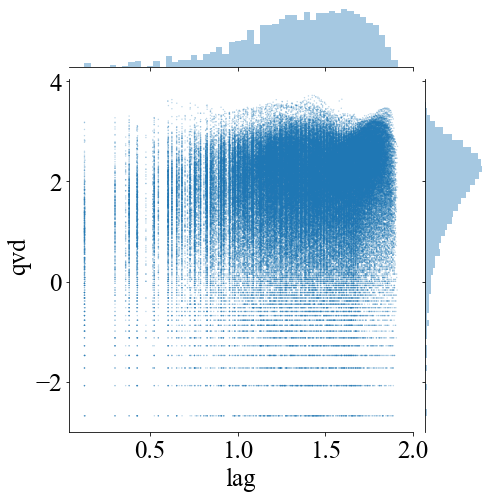

In [17]:
ax=sns.jointplot(x=np.log10(df.lag), y=np.log10(df.qvd), alpha=0.3, s=2, edgecolor='none')
ax.fig.set_size_inches(8,8)

Structure Function Data Groups

In [18]:
#m=1.341#separation between lags mib valu=min lag

In [19]:
m=5

In [20]:
n=df.lag.max()//m#Number of points

In [21]:
#Grouping points
dfx=dict()

for i in range(int(n)):
    p=0+i*m
    q=m+i*m
    dfx[i]=df[df['lag'].between(p,q)]

In [22]:
dfx

{0:              lag         qvd
 0       1.340000    0.920241
 1       2.680000   16.159518
 2       4.020000  134.626484
 59      2.300000   48.211456
 60      2.661879    8.547183
 ...          ...         ...
 179445  2.680000    0.834686
 179446  4.020000    6.779736
 179447  1.340000    0.834686
 179448  2.680000    6.779736
 179449  1.340000    2.856712
 
 [6986 rows x 2 columns],
 1:              lag         qvd
 3       5.370000  462.918870
 4       6.710000  714.125929
 5       8.050000  830.848401
 6       9.390000  781.566461
 63      5.841823  592.812685
 ...          ...         ...
 179434  6.710000    1.410619
 179435  8.050000    0.252492
 179439  5.360000    0.018780
 179440  6.700000    3.338743
 179444  5.360000    7.764665
 
 [17416 rows x 2 columns],
 2:               lag         qvd
 7       10.730000  633.528662
 8       12.070000  330.543951
 9       13.410000  224.497111
 10      14.750000  276.481347
 67      10.973737  364.599135
 ...           ...         .

In [23]:
len(dfx)

16

Main Matrix Statistical Properties Groups

In [24]:
lgp=dict()
dl=dict()
dery=dict()
dfm=dict()
dfv=dict()
dfs=dict()
derx=dict()
dlm=dict()
dlv=dict()
dls=dict()

In [25]:
n=len(dfx)

for i in range(n):
    lgp[i]=(dfx[i]["lag"].max())
    dl[i]=len(dfx[i])#Numer of points each group
    #errorY
    dfm[i]=dfx[i]["qvd"].mean()
    dfv[i]=dfx[i]["qvd"].var()
    dfs[i]=dfx[i]["qvd"].std()
    if dl[i]>0:
        dery[i]=dfs[i]/np.sqrt(dl[i])
    #errorX
    dlm[i]=dfx[i]["lag"].mean()
    dlv[i]=dfx[i]["lag"].var()
    dls[i]=dfx[i]["lag"].std()
    if dl[i]>0:
        derx[i]=dls[i]/np.sqrt(dl[i])  


In [26]:
g=[[0]*(7) for i in range(n)]

for i in range(n):

    g[i][0]=lgp[i]
    g[i][1]=dfm[i]
    g[i][2]=dery[i]
    g[i][3]=dfs[i]
    g[i][4]=dfv[i]
    g[i][5]=dl[i]
    g[i][6]=derx[i]

In [27]:
sf=pd.DataFrame(g)
sf.columns=['Lag','Nmqvd','ErrY','StD','Var','# P','ErrX']
sf.describe()

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,42.474325,234.184054,4.008625,330.722334,114764.599248,11229.125000,0.016547
std,23.801419,78.853290,2.446369,75.805626,52035.753316,6943.586306,0.008549
min,5.000000,87.584569,1.900601,218.677488,47819.843684,1055.000000,0.009424
25%,23.659498,189.992902,2.373694,266.447035,71040.123476,6435.750000,0.011226
50%,42.484717,225.556520,2.764542,322.165335,103801.543340,10578.500000,0.013326
75%,61.137520,281.810086,4.881634,379.647393,144154.818761,16795.000000,0.018287
max,79.965833,371.605842,9.560226,460.815172,212350.622341,22712.000000,0.041981


In [28]:
sf

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
0,5.000000,87.584569,2.616314,218.677488,47819.843684,6986,0.012831
1,10.000000,141.517476,1.900601,250.821773,62911.561921,17416,0.010680
2,15.000000,184.224379,1.974312,297.538711,88529.284698,22712,0.009674
3,19.948236,227.029572,2.370066,352.877341,124522.417663,22168,0.009424
4,24.896586,232.635882,2.658502,371.030069,137663.311831,19478,0.010561
5,29.982163,230.846630,3.011740,387.895260,150462.732747,16588,0.011408
6,34.998813,219.783598,2.730090,325.488048,105942.469673,14214,0.012098
7,39.992244,191.915743,2.319363,254.686782,64865.356861,12058,0.012561
8,44.977190,196.553095,2.374903,254.303240,64670.138050,11466,0.013820
9,49.999584,224.083469,2.798995,275.541160,75922.930755,9691,0.014797


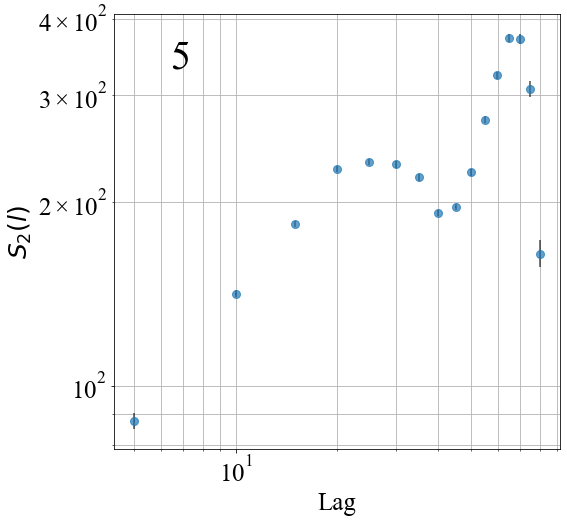

In [29]:
fig, ax=plt.subplots(figsize=(8,8))
ax.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt="o", ecolor='k', alpha=0.7, markersize=8)
ax.set(xscale='log',yscale='log')
ax.set(xlabel='Lag', ylabel='$S_{2}(l)$')
plt.grid(True, which="both", ls="-")

ax.text(0.15, 0.9,m, ha='center', va='center', transform=ax.transAxes, size=40)


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="25"

In [30]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.780218124389648 seconds ---
